In [34]:
# import libraries 
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import newsrc.population as p
import newsrc.model as m
import newsrc.simulation as s


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
try:
    input_args = json.loads(open('../input/simulation.json').read())
except Exception as ex:
    print('simulation.json does not exist!')
    print(ex)

In [131]:
simulation =  s.Simulation()

In [145]:
results, results_avg, agents_per_intervention = simulation.simulate_interventions(365)

In [149]:
agents_per_intervention

{'67.0': {'nointervention': [],
  'outdegree': [974, 967, 987],
  'indegree': [983, 978, 987],
  'closeness': [983, 974, 978],
  'betweenness': [987, 974, 973]},
 '71.0': {'nointervention': [],
  'outdegree': [1090, 1104, 1102],
  'indegree': [1098, 1087, 1094],
  'closeness': [1098, 1087, 1094],
  'betweenness': [1100, 1104, 1085]},
 '72.0': {'nointervention': [],
  'outdegree': [1112, 1114, 1116],
  'indegree': [1126, 1137, 1292],
  'closeness': [1126, 1137, 1292],
  'betweenness': [1132, 1120, 1118]},
 '74.0': {'nointervention': [],
  'outdegree': [1168, 1165],
  'indegree': [1157, 1155],
  'closeness': [1157, 1163],
  'betweenness': [1165, 1162]},
 '77.0': {'nointervention': [],
  'outdegree': [1290, 1263, 1266],
  'indegree': [1268, 1283, 1266],
  'closeness': [1266, 1268, 1286],
  'betweenness': [1263, 1266, 1268]},
 '78.0': {'nointervention': [],
  'outdegree': [1375, 1392, 1397],
  'indegree': [1377, 1396, 1374],
  'closeness': [1377, 1396, 1374],
  'betweenness': [1377, 1396, 

In [160]:
success_rates = simulation.getSuccessRates(results_avg)
success_rates.head(15)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,67.0,nointervention,7.69,1.587739,1.709798
1,67.0,outdegree,10.45,1.634261,1.805035
2,67.0,indegree,16.41,1.685477,1.962008
3,67.0,closeness,16.04,1.736620,2.015183
4,67.0,betweenness,22.51,1.787029,2.189342
5,71.0,nointervention,14.93,1.439917,1.654857
6,71.0,outdegree,20.26,1.484625,1.785411
7,71.0,indegree,19.84,1.514567,1.815027
8,71.0,closeness,17.30,1.549599,1.817723
9,71.0,betweenness,16.62,1.581328,1.844221


In [163]:
success_rates = success_rates[success_rates.Intervention.isin(['indegree','betweenness','closeness','outdegree'])]
success_rates.head(5)

,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
1,67.0,outdegree,10.45,1.634261,1.805035
2,67.0,indegree,16.41,1.685477,1.962008
3,67.0,closeness,16.04,1.736620,2.015183
4,67.0,betweenness,22.51,1.787029,2.189342
6,71.0,outdegree,20.26,1.484625,1.785411


In [164]:
sr = success_rates.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

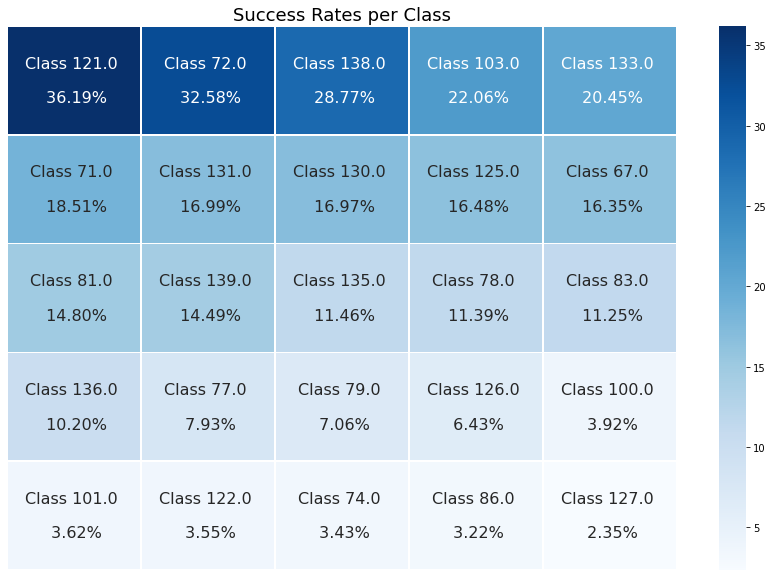

In [165]:
simulation.heatmap(sr)

In [136]:
success_rates

,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,67.0,nointervention,7.69,1.587739,1.709798
1,67.0,outdegree,10.60,1.626699,1.799158
2,67.0,indegree,11.27,1.668552,1.856546
3,67.0,closeness,23.84,1.720437,2.130670
4,67.0,betweenness,35.26,1.775283,2.401287
...,...,...,...,...,...
125,139.0,nointervention,13.15,1.355384,1.533674
126,139.0,outdegree,11.65,1.393697,1.555998
127,139.0,indegree,12.57,1.426166,1.605505
128,139.0,closeness,17.61,1.464154,1.722013


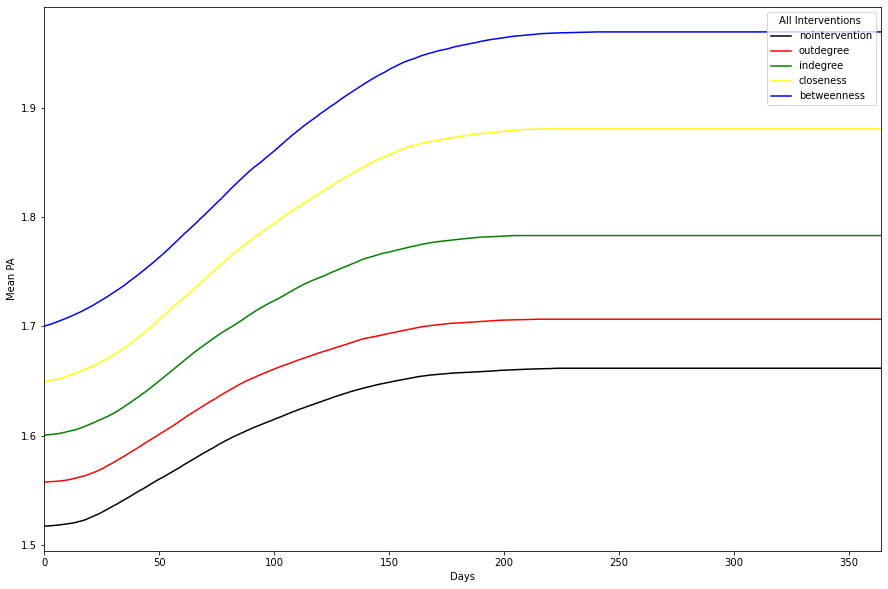

In [137]:
simulation.plot_interventions_averaged(results_avg)

In [10]:
sub_gr = simulation.population.get_class_graphs(simulation.population.graph)

In [ ]:
sub_gr[0]

In [11]:
avgw=pd.DataFrame(pd.np.empty((0, 2)))
avgw.columns=['ID','avgW']
rowCounter=1
for (u, v, wt) in sub_gr[0].edges.data('weight'):
    if u in avgw['ID'].values:
        ind=avgw[avgw['ID']==u]['avgW'].index[0]
        val=avgw[avgw['ID']==u]['avgW'].values[0]
        avgw.loc[ind]=[u,wt+val]
    else:
        avgw.loc[rowCounter]=[u,wt]
        rowCounter=rowCounter+1

<ipython-input-11-4f72fbda0fbd>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  avgw=pd.DataFrame(pd.np.empty((0, 2)))


In [12]:
avgw

,ID,avgW
1,963.0,5.500000
2,965.0,3.833333
3,966.0,3.333333
4,967.0,8.333333
5,968.0,3.833333
6,971.0,6.166667
7,972.0,1.666667
8,973.0,5.166667
9,974.0,5.000000
10,975.0,3.333333


In [38]:
pop_details, agents_details = simulation.population.population_network_summary(simulation.population.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/mixing.py:208: RuntimeWarning: invalid value encountered in true_divide
  a = a / a.sum()
/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [39]:
agents_details

,ParticipantID,SchoolClassID,Gender,PA,BMI,Environment,InDegree,OutDegree,EigenVector,Closeness,Betweenness
0,963,67.0,1.0,2.177445,18.480,0.524074,12,13,0.238135,0.772727,0.024125
1,965,67.0,1.0,1.583932,15.966,0.750000,12,10,0.240811,0.772727,0.017039
2,966,67.0,0.0,1.852486,20.077,0.000000,10,8,0.195491,0.708333,0.006038
3,967,67.0,1.0,1.639701,18.127,0.416667,9,17,0.179114,0.680000,0.021561
4,968,67.0,1.0,2.842332,20.490,0.750000,9,8,0.179114,0.680000,0.000460
...,...,...,...,...,...,...,...,...,...,...,...
446,2858,139.0,1.0,1.074641,19.140,0.000000,11,11,0.230047,0.720000,0.027564
447,2859,139.0,1.0,1.090686,23.533,0.524074,8,18,0.187111,0.642857,0.023751
448,2862,139.0,0.0,1.495850,17.572,0.500000,9,10,0.181506,0.666667,0.011792
449,2863,139.0,0.0,1.518219,20.031,1.083333,11,18,0.227819,0.720000,0.105571


In [40]:
pop_details

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,AvgShortestPath,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,67.0,18,50,205,0.67,0,0.33,0.37,-3.57,-0.10,1.33,NaN,0.47,15.61
1,71.0,20,35,247,0.65,0,0.31,0.39,-1.75,-0.08,1.35,NaN,0.43,16.33
2,72.0,20,30,238,0.63,0,0.23,0.42,-0.57,-0.10,1.27,NaN,0.50,11.55
3,74.0,12,50,104,0.79,0,0.25,0.25,2.32,-0.06,1.05,NaN,0.77,14.93
4,77.0,19,68,223,0.65,0,0.25,0.39,-0.80,-0.10,1.35,0.16,0.47,18.73
5,78.0,20,50,303,0.80,0,0.23,0.23,3.23,-0.05,1.20,NaN,0.62,17.72
6,79.0,25,52,275,0.46,0,0.24,0.59,-0.26,-0.11,1.52,-0.14,0.53,16.01
7,81.0,28,46,663,0.88,0,0.13,0.13,2.96,-0.02,1.12,NaN,0.59,17.86
8,83.0,14,50,142,0.78,0,0.18,0.26,-1.60,-0.09,1.22,NaN,0.66,17.65
9,86.0,16,50,192,0.80,0,0.09,0.23,-0.42,-0.08,1.20,NaN,0.59,20.14
